<h1 style="color: darkblue;">1. Analyse multivariée pour prédire l'espérance de vie</h1>

<h2 style="color: darkblue;">1.1 Chargement et exploration préliminaire des données</h2>
<ul>
  <li>Chargement du jeu de données</li>
  <li>Vue d’ensemble : dimensions, types, premières lignes</li>
  <li>Vérification de l'équilibrage des données</li>
</ul>

<h2 style="color: darkblue;">1.2 Analyse exploratoire des données (EDA)</h2>

<h3 style="color: navy;">1.2.1 Analyse des valeurs manquantes</h3>

<h3 style="color: navy;">1.2.2 Analyse des statistiques descriptives</h3>

<h3 style="color: navy;">1.2.3 Analyse des variables redondantes</h3>

<h3 style="color: navy;">1.2.4 Analyse visuelle des variables numériques</h3>
<ul>
  <li>Distribution de chaque variable</li>
  <li>Identification des corrélations</li>
  <li>Décision sur la conservation ou non de certaines variables</li>
</ul>

<h3 style="color: navy;">1.2.5 Analyse des variables catégorielles</h3>
<ul>
  <li>Équilibrage selon les pays</li>
  <li>Équilibrage selon les régions</li>
  <li>Équilibrage selon les groupes de revenus (<i>IncomeGroup</i>)</li>
</ul>

<h3 style="color: navy;">1.2.6 Détection des données aberrantes (Outliers)</h3>
<ul>
  <li>Calcul du pourcentage d’outliers</li>
  <li>Méthode de winsorization</li>
  <li>Standardisation des données avant visualisation</li>
  <li>Visualisation des boxplots</li>
</ul>

<h2 style="color: darkblue;">2. Préparation des données</h2>
<ul>
  <li>Imputation des valeurs manquantes dans X_train et X_test</li>
  <li>Imputation des valeurs manquantes dans y_train et y_test</li>
  <li>Transformation log pour réduire l'asymétrie des distributions</li>
  <li>Winsorization pour limiter l'influence des valeurs extrêmes sans les supprimer</li>
  <li>Standardisation des données pour ramener toutes les variables à la même échelle</li>
  <li>Encodage des variable catégorielles</li>
  <li>Sélection des variables finales utilisées dans le modele</li>
</ul>

<h2 style="color: darkblue;">3. Modélisation : Prédiction multivariée de l'espérance de vie</h2>
<ul>
  <li>Régression linéaire multiple</li>
  <li>Arbres de décision et forêts aléatoires</li>
  <li>Régression Ridge/Lasso</li>
</ul>

<h2 style="color: darkblue;">4. Évaluation des performances des modèles</h2>
<ul>
  <li>MAE, RMSE, R²</li>
  <li>Comparaison des modèles</li>
  <li>Analyse des résidus</li>
</ul>


<h1 style="color: darkblue;">1. Analyse multivariée pour prédire l'espérance de vie</h1>

In [3]:
# Importation des bibliothèques pour la manipulation des données
import pandas as pd
import numpy as np

# Importation des bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from scipy.stats.mstats import winsorize


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [4]:
# Functions importée de functions_life_expectancy.py
from  functions_life_expectancy import (
plot_distribution_donnees_numeriques,
plot_box_donnees_numeriques,
proportion_valeurs_abberantes,
groupwise_impute,
apply_groupwise_impute,
groupwise_target_impute,
save_to_csv,
evaluate,
evaluate_metrics

)


<h2 style="color: darkblue;">1.1 Chargement et exploration préliminaire des données</h2>
<li><b>Chargement du jeu de données</b></li>

In [8]:
# Charger les données
df = pd.read_csv('life expectancy.csv')

<li><b>Vue d’ensemble : dimensions, types, premières lignes</b></li>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [13]:
# Afficher toutes les colonnes
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [15]:
# Afficher les premieres et dernieres lignes du dataframe
# Afficher les premières lignes
print("Premières lignes des données:")
df.head(1)

Premières lignes des données:


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809,NaN,NaN,2179727.1,9689193.7,5795426.38


<li><b>Vérification de l'équilibrage des données selon les années</b></li>

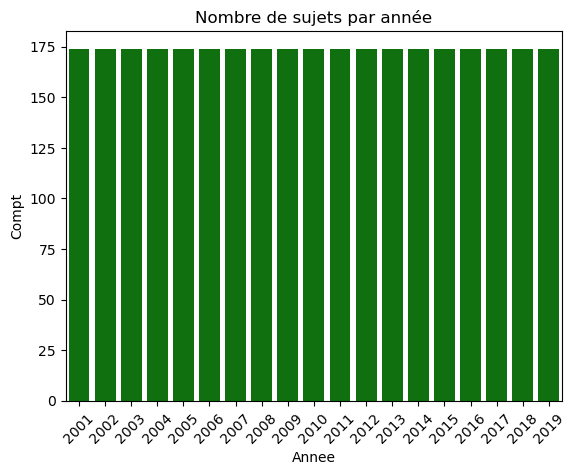

In [18]:
# Voyons si les données sont equilibrés , c'est a dire si pour chaque année nous avons le nombre de personnes similaire ou identique
year_counts = df['Year'].value_counts().sort_index()
#Création d'un DataFrame des comptes de sujets par année 
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['Year', 'Count']

# Afficher l'histogramme
sns.barplot(x='Year', y='Count', data=year_counts_df, color='green')
plt.title('Nombre de sujets par année')
plt.xlabel('Annee')
plt.ylabel('Compt')
plt.grid(False)
plt.xticks(rotation=45)  
plt.show()


<h2 style="color: darkblue;">1.2 Analyse exploratoire des données (EDA)</h2>

<h3 style="color: navy;">1.2.1 Analyse des valeurs manquantes</h3>

In [22]:
# Explorer les valeurs manquantes
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [24]:
# Explorer les valeurs manquantes en %
missing_data_percentage = df.isnull().sum()* 100 / len(df)
print(missing_data_percentage)

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64


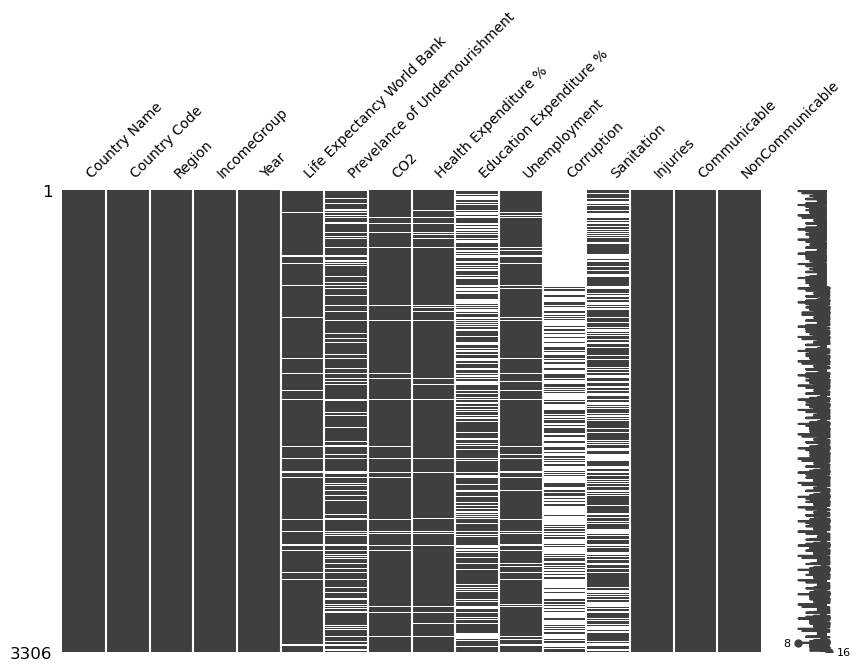

In [26]:
# Visualiser les valeurs manquantes
msno.matrix(df,figsize=(10,6), fontsize=10)
plt.show()

<h3 style="color: navy;">1.2.2 Analyse des statistiques descriptives</h3>

In [29]:
# Obtenir un résumé statistique
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [31]:
# Résumé de base
df.describe()

# Médiane pour comparaison avec la moyenne
df.median(numeric_only=True)

# Écart interquartile (IQR)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print("Écart interquartile (IQR) :\n", IQR)



Écart interquartile (IQR) :
 Year                              1.000000e+01
Life Expectancy World Bank        1.316700e+01
Prevelance of Undernourishment    1.227500e+01
CO2                               5.677000e+04
Health Expenditure %              3.913723e+00
Education Expenditure %           2.383708e+00
Unemployment                      6.364500e+00
Corruption                        7.500000e-01
Sanitation                        5.553284e+01
Injuries                          7.841022e+05
Communicable                      2.773871e+06
NonCommunicable                   3.599992e+06
dtype: float64


<h3 style="color: navy;">1.2.3 Analyse des variables redondantes</h3>

On remarque que plusieurs colonnes sont similaires entre eux, examinons les afin de voir si on peux en eliminer une ou plusieurs

In [34]:
# Calculer le nombre de variables uniques por "Country Code " et "Country Name"
nombre_de_pays =df["Country Name"].nunique()
print(f"Nombre de pays est  {nombre_de_pays}")
nombre_de_codes = df["Country Code"].nunique()
print(f"Nombre de code pays est  {nombre_de_codes}")

Nombre de pays est  174
Nombre de code pays est  174


<h3 style="color: navy;">1.2.4 Analyse visuelle des variables numériques</h3>

In [37]:
num_features = [ "Prevelance of Undernourishment", "CO2", "Health Expenditure %", "Education Expenditure %", "Unemployment", "Corruption", "Sanitation", "Injuries", "Communicable", "NonCommunicable"]
cat_features = ["Country Name", "Region", "IncomeGroup"]

<li><b>Distribution de chaque variable</b></li>

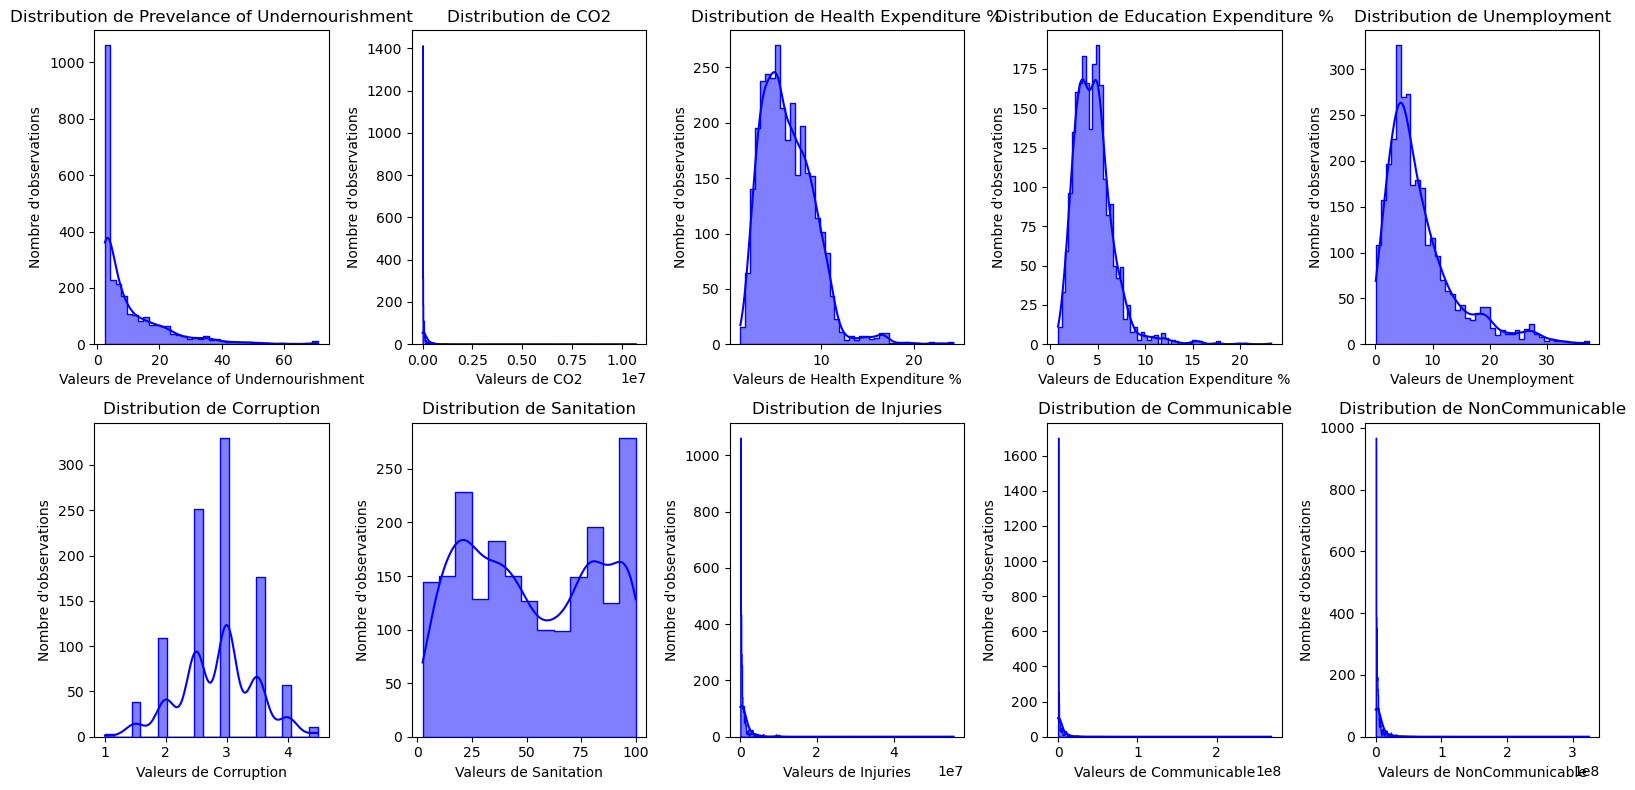

In [40]:
# Affichier la distribution des colonnes contenant des données numériques
plot_distribution_donnees_numeriques(df, num_features)

<div style="color: #3399ff;">

**Repérer les variables avec des distributions similaires**

Le graphique ci-dessus montre deux variables : **Health Expenditure %**  et **Education Expenditure %** qui ont:

 - Une forme de distribution similaire : asymétrique, concentrée entre 0 et 10 %.
 - Une fonction sociale similaire (indicateurs d’investissement public dans le bien-être).
   
On veux confirmer s'il y aredondance, pour cela calculaons la matrice de corrélation avec Pearson.
</div>

 <li><b>Identification des corrélations</b></li>

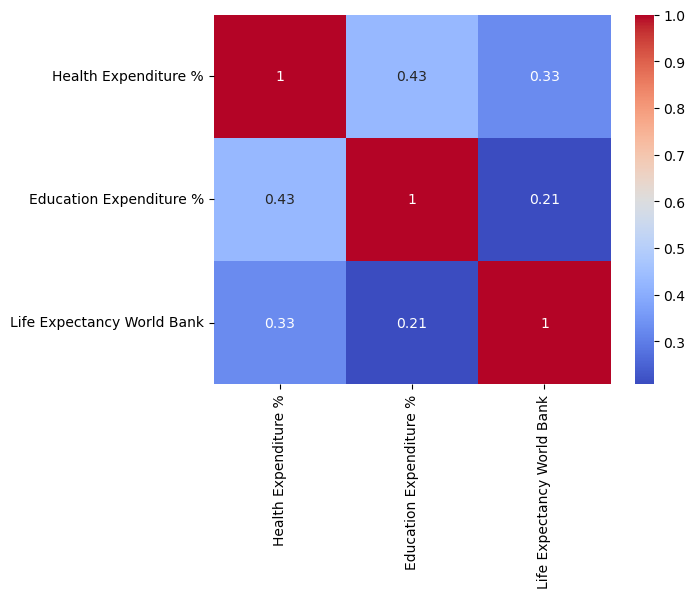

In [44]:
corr = df[['Health Expenditure %', 'Education Expenditure %', 'Life Expectancy World Bank']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Conclusion basée sur le Heatmap ci-dessus : 

 **Health Expenditure %**  et **Education Expenditure %** ne sont pas assez corrélées entre elles pour justifier d’en supprimer une sur la base de redondance.

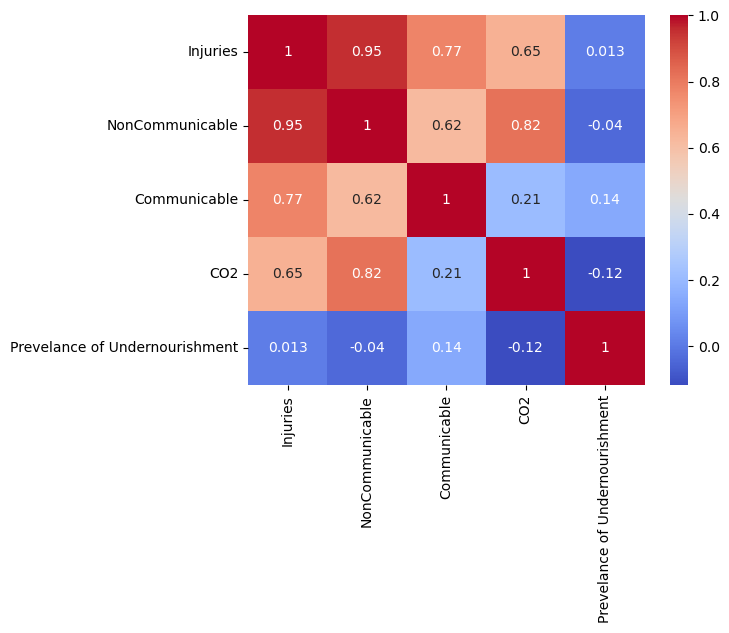

In [47]:
corr = df[['Injuries', 'NonCommunicable', 'Communicable', 'CO2', 'Prevelance of Undernourishment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<div style="color: #3399ff;">

####  Analyse de la heatmap

Le graphique de corrélation ci-dessus révèle les relations suivantes :

- Les variables **'Injuries'** et **'NonCommunicable'** sont très fortement corrélées (**95%**).
- De plus, **'Injuries'** est également corrélée à **'Communicable'** à hauteur de **77%**.

####  Conclusion

Étant donné que **'Injuries'** est fortement corrélée à deux autres variables, elle semble redondante et on va la supprimer.  

</div>


<li>Les variables <b>Injuries</b>, <b>NonCommunicable</b>, <b>Communicable</b>, <b>CO2</b> et <b>Prevalence of Undernourishment</b> présentent une forte asymétrie (distribution non normale)</li>
      <li>Nous allons appliquer une transformation (log) pour rendre leur distribution plus proche d’une loi normale et améliorer la performance des modèles sensibles à la normalité</li>
    

In [51]:
# Liste des colonnes à transformer
cols_to_transform = ['Injuries', 'NonCommunicable', 'Communicable', 'CO2', 'Prevelance of Undernourishment']

# Ajouter 1 pour éviter log(0)
for col in cols_to_transform:
    df[col + '_log'] = np.log1p(df[col])


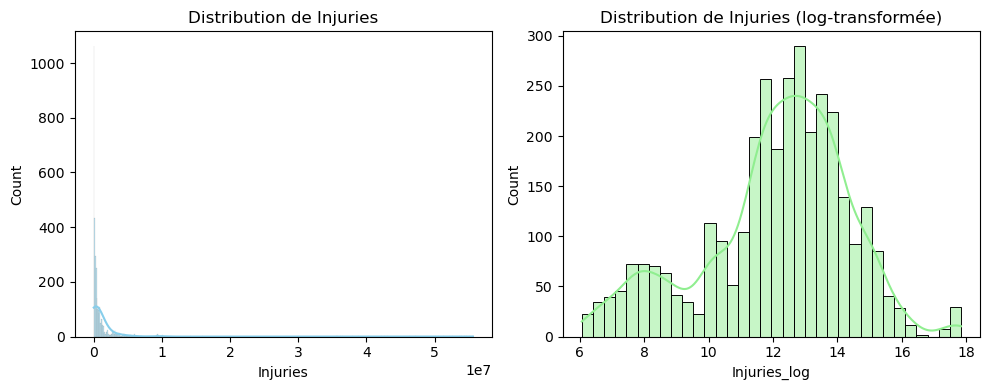

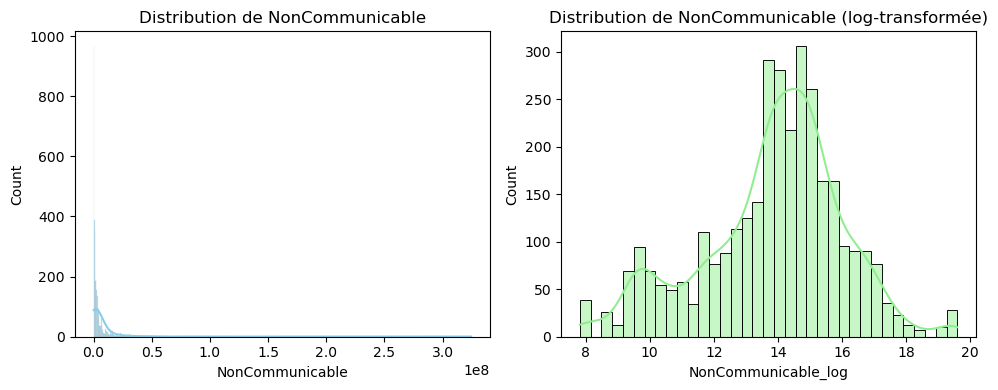

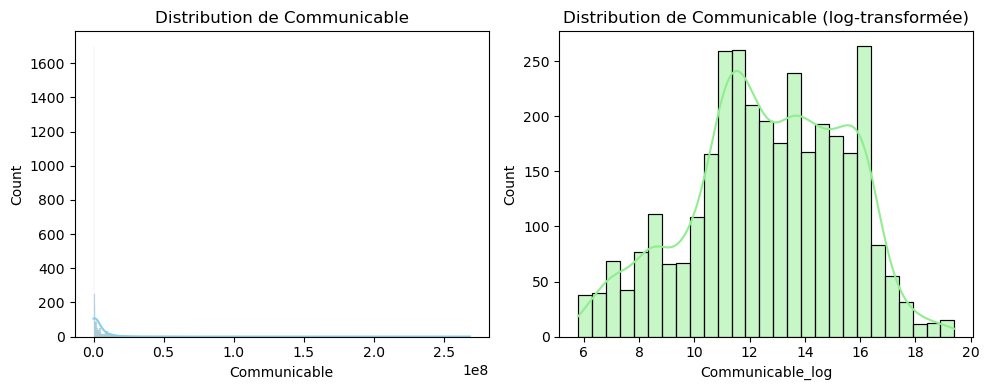

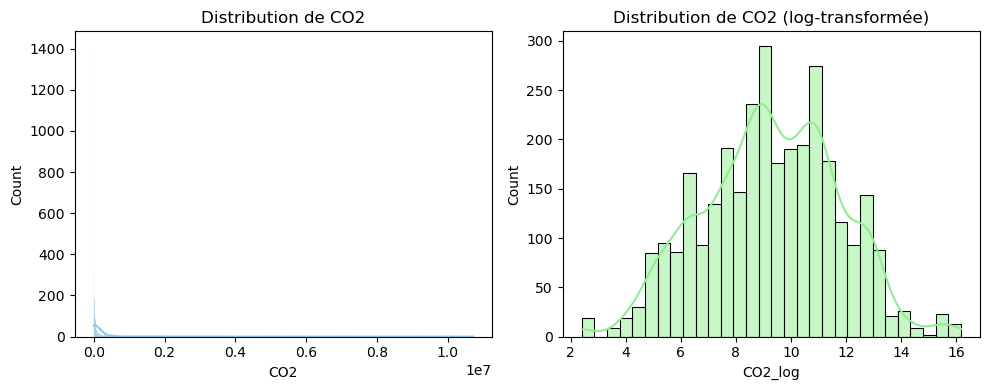

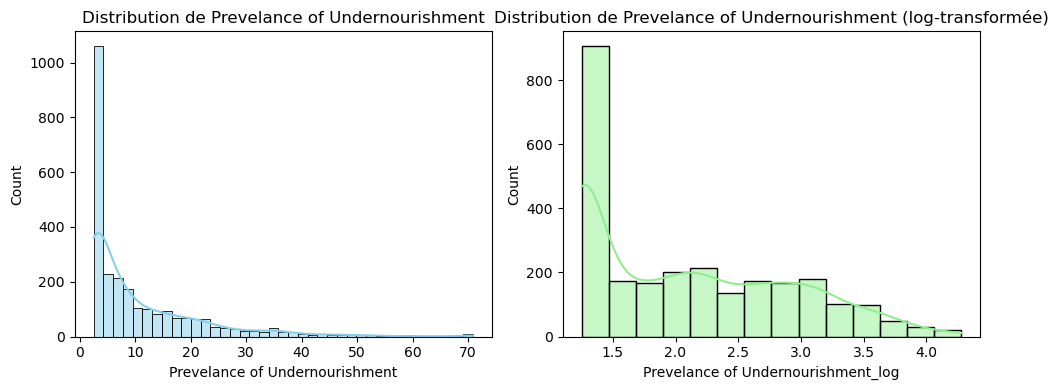

In [53]:
# Visualiser les changemegt apres la transformation log
for col in cols_to_transform:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution de {col}')
    
    sns.histplot(df[col + '_log'], kde=True, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Distribution de {col} (log-transformée)')
    
    plt.tight_layout()
    plt.show()


<h3 style="color: navy;">1.2.5 Analyse des variables catégorielles</h3>

In [55]:
cat_features = ["Country Name", "Region", "IncomeGroup"]

#IncomeGroup ets une variable catégorielle ordinale on pourra l'encoder et le garder 
df["IncomeGroup"].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

<li><b> Pour les variables **"Country Name" et  "Region"**, on va vérifier si les données sont équilibrés quand groupé selon chaque variables</b></li>

<li><b>Équilibrage selon les pays</b></li>

In [60]:
# Pour Country Name
country_counts = df['Country Name'].value_counts()
country_proportions = df['Country Name'].value_counts(normalize=True) * 100

# Pour Region
region_counts = df['Region'].value_counts()
region_proportions = df['Region'].value_counts(normalize=True) * 100

# Affichage 
print("Répartition des données par Pays :")
display(pd.DataFrame({'Nombre': country_counts, 'Pourcentage': country_proportions.round(2)}))

print("\nRépartition des données par Région :")
display(pd.DataFrame({'Nombre': region_counts, 'Pourcentage': region_proportions.round(2)}))


Répartition des données par Pays :


,Nombre,Pourcentage
Country Name,,
Afghanistan,19,0.57
Nepal,19,0.57
Malawi,19,0.57
Malaysia,19,0.57
Namibia,19,0.57
...,...,...
Guinea-Bissau,19,0.57
Equatorial Guinea,19,0.57
Greece,19,0.57



Répartition des données par Région :


,Nombre,Pourcentage
Region,,
Europe & Central Asia,893,27.01
Sub-Saharan Africa,836,25.29
Latin America & Caribbean,551,16.67
East Asia & Pacific,513,15.52
Middle East & North Africa,304,9.20
South Asia,152,4.60
North America,57,1.72


C:\Users\adele\AppData\Local\Temp\ipykernel_12152\2428208161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='Blues_d')


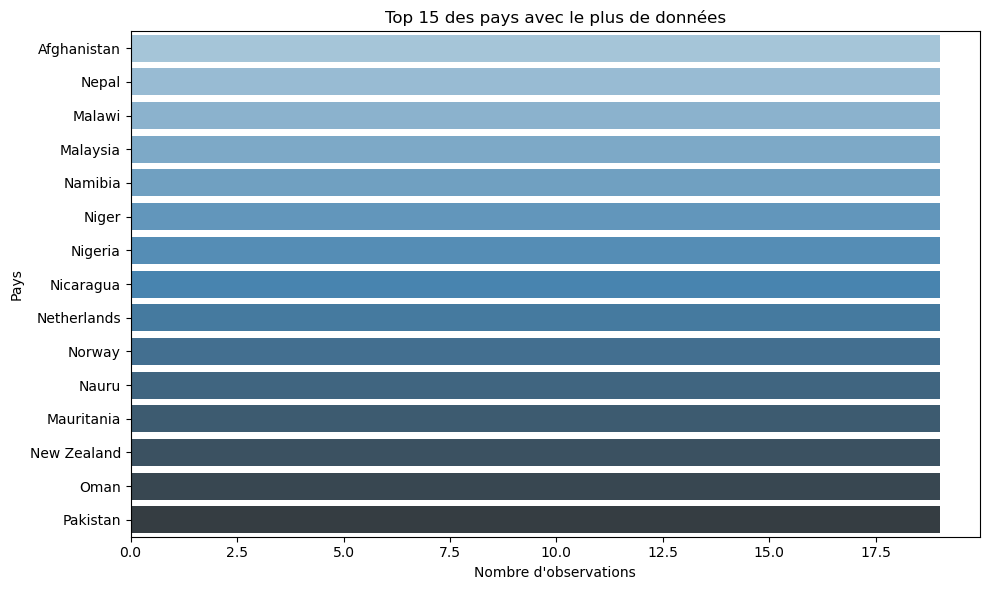

In [62]:
top_countries = df['Country Name'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Blues_d')
plt.title("Top 15 des pays avec le plus de données")
plt.xlabel("Nombre d'observations")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()


<li><b>Équilibrage selon les régions</b></li>

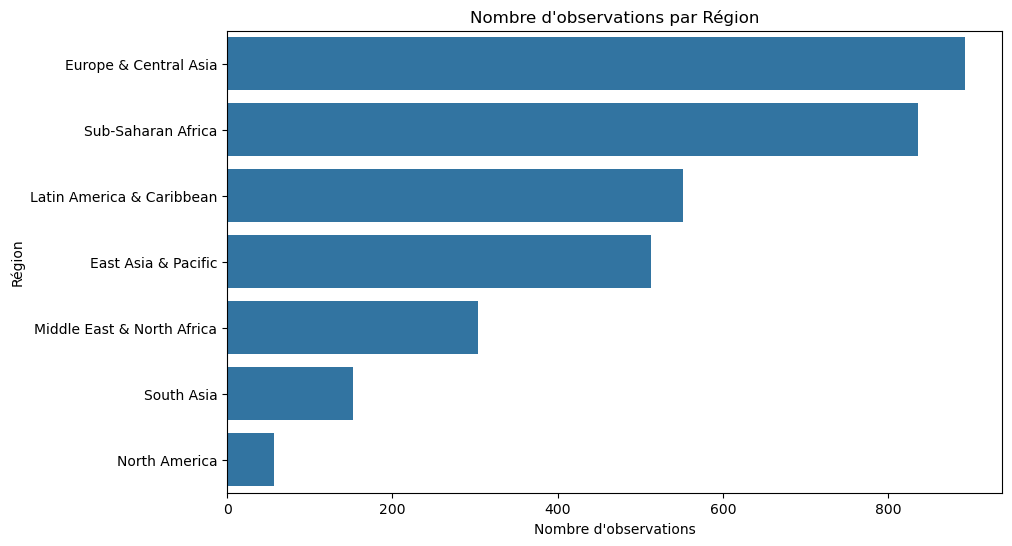

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Région
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index)
plt.title("Nombre d'observations par Région")
plt.xlabel("Nombre d'observations")
plt.ylabel("Région")
plt.show()


<li><b>Équilibrage selon les groupes de revenus (<i>IncomeGroup</i>)</b></li>


In [68]:
# Voir les sous catégories de 
df['IncomeGroup'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [70]:
group_counts = df['IncomeGroup'].value_counts()
group_percent = df['IncomeGroup'].value_counts(normalize=True) * 100

income_distribution = pd.DataFrame({
    "Nombre d'observations": group_counts,
    "Pourcentage": group_percent.round(2)
})

print(income_distribution)


                     Nombre d'observations  Pourcentage
IncomeGroup                                            
High income                           1083        32.76
Upper middle income                    931        28.16
Lower middle income                    855        25.86
Low income                             437        13.22


C:\Users\adele\AppData\Local\Temp\ipykernel_12152\4030219232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=incomegroupe.index, x=incomegroupe.values, palette='Blues_d')


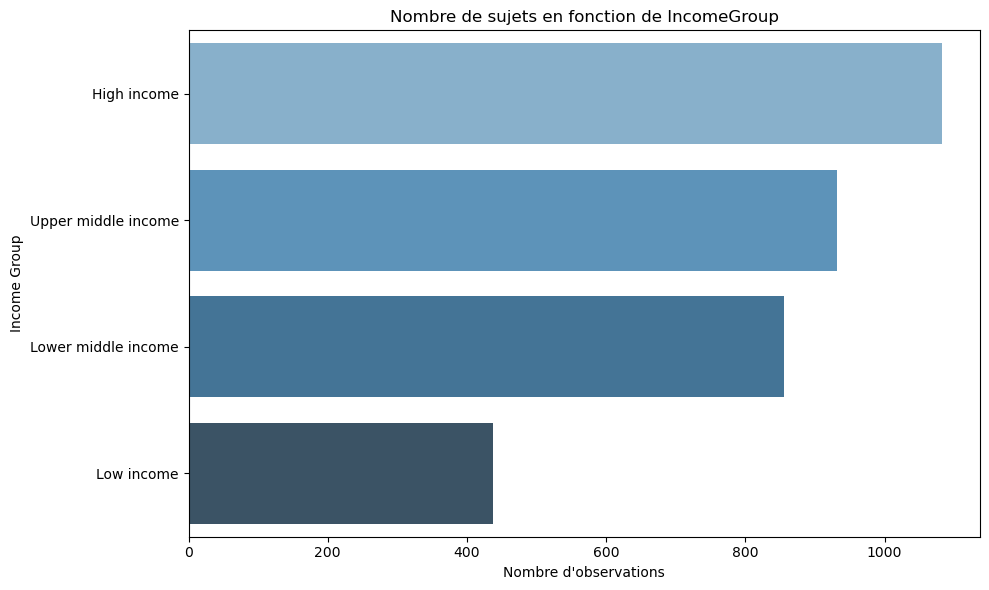

In [72]:
incomegroupe = df['IncomeGroup'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=incomegroupe.index, x=incomegroupe.values, palette='Blues_d')
plt.title("Nombre de sujets en fonction de IncomeGroup")
plt.xlabel("Nombre d'observations")
plt.ylabel("Income Group")
plt.tight_layout()
plt.show()


<h3 style="color: navy;">1.2.6 Détection des données aberrantes (Outliers)</h3> 

<li><b>Calcul du pourcentage d’outliers</b></li>

In [75]:
# Calculate the persentage of outliers 
percentag_abberantes = proportion_valeurs_abberantes(df)
print("Pourcentage des valeurs abbéranres pour chaque variable:")
for variable, percentage in percentag_abberantes.items():
    print(f"{variable}: {percentage:.2f}%")

Pourcentage des valeurs abbéranres pour chaque variable:
Year: 0.00%
Life Expectancy World Bank: 0.64%
Prevelance of Undernourishment: 5.72%
CO2: 14.90%
Health Expenditure %: 1.86%
Education Expenditure %: 2.71%
Unemployment: 6.13%
Corruption: 1.44%
Sanitation: 0.00%
Injuries: 11.52%
Communicable: 15.28%
NonCommunicable: 13.28%
Injuries_log: 4.20%
NonCommunicable_log: 3.24%
Communicable_log: 0.00%
CO2_log: 0.86%
Prevelance of Undernourishment_log: 0.00%


In [77]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable', 'Injuries_log', 'NonCommunicable_log',
       'Communicable_log', 'CO2_log', 'Prevelance of Undernourishment_log'],
      dtype='object')

C:\Users\adele\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib

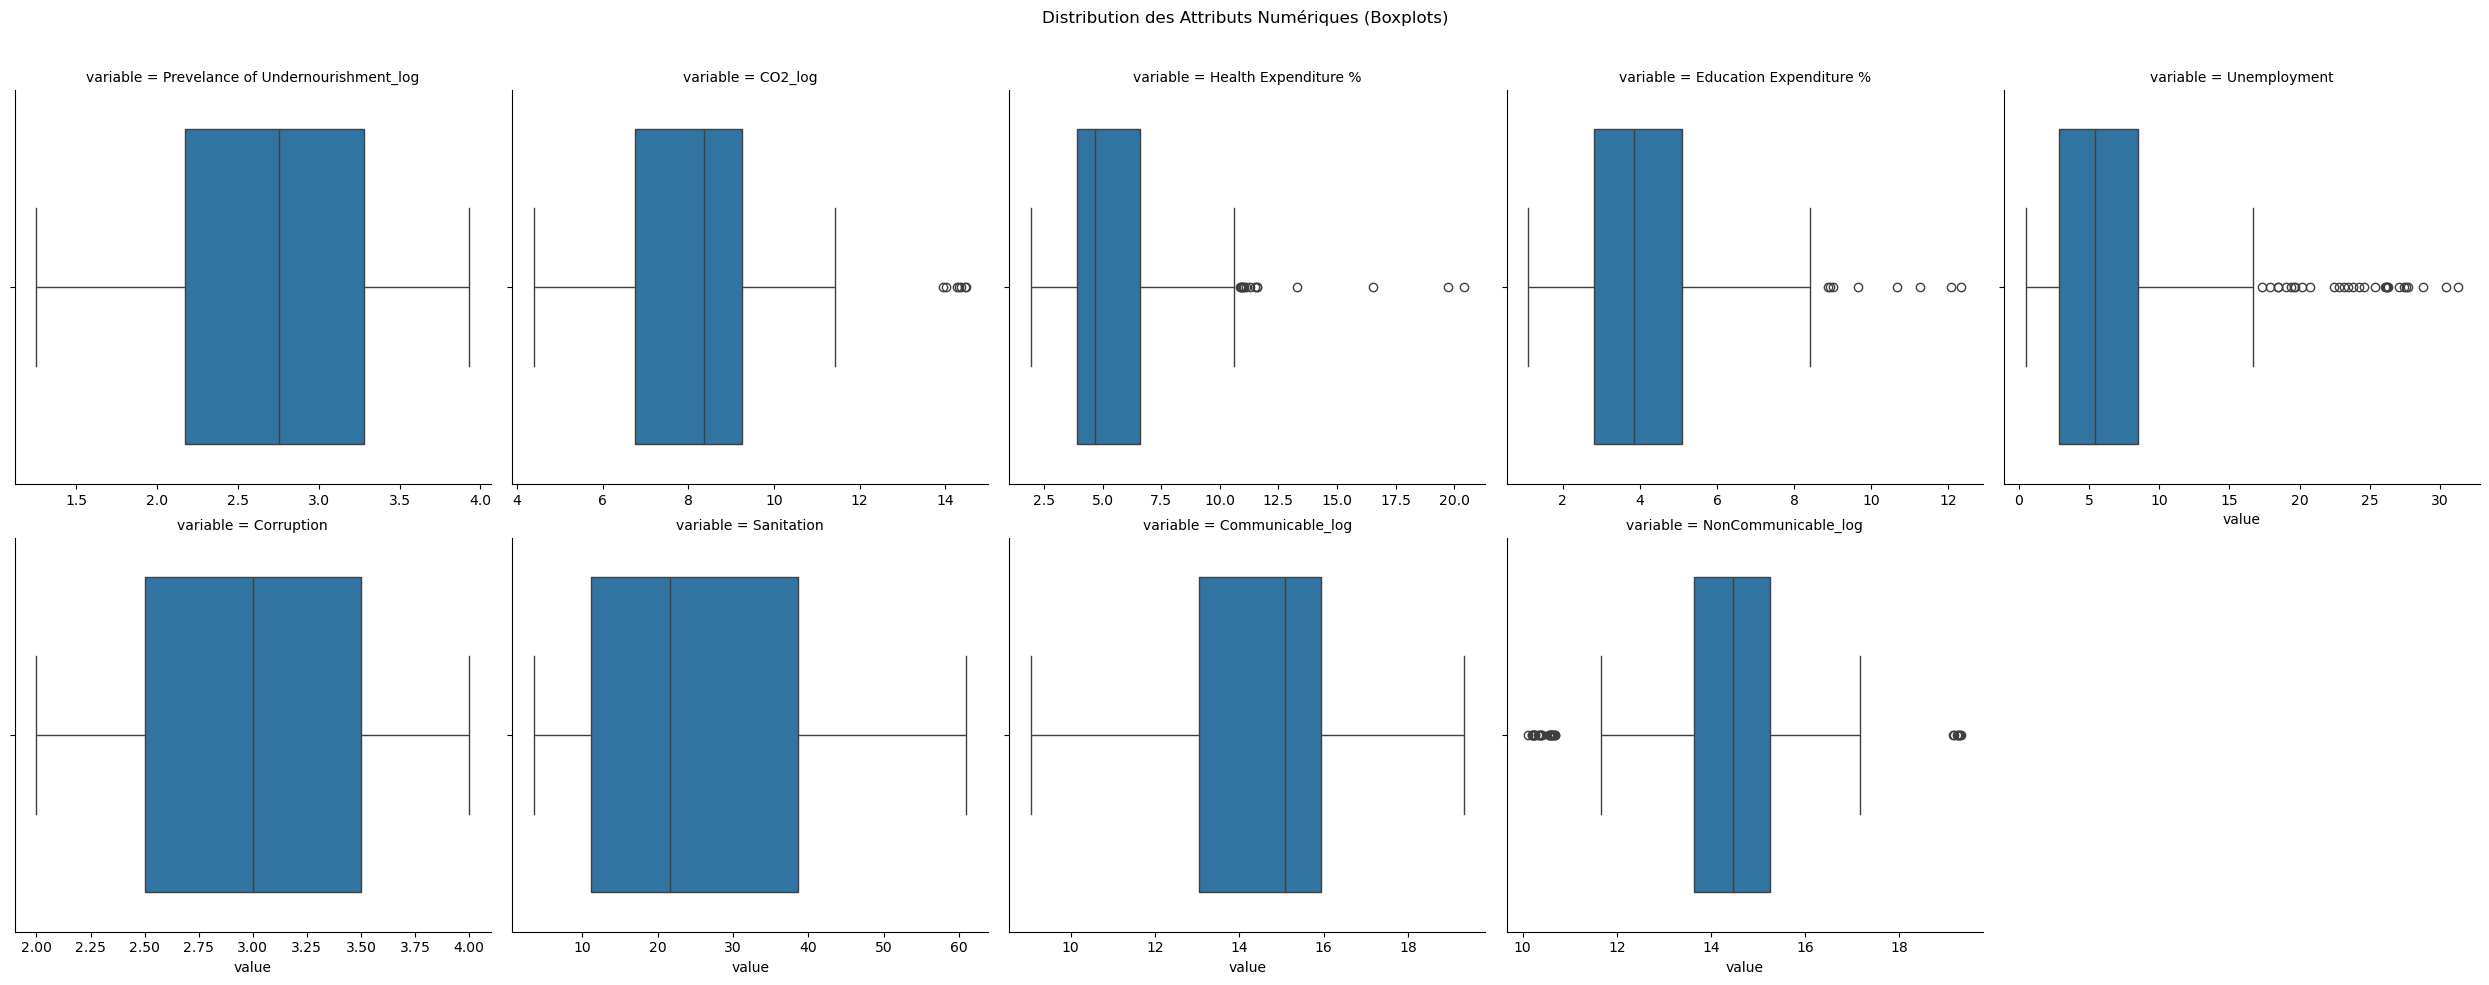

In [79]:
num_features = ["Prevelance of Undernourishment_log", "CO2_log", "Health Expenditure %", "Education Expenditure %", "Unemployment", "Corruption", "Sanitation", "Communicable_log", "NonCommunicable_log"]

plot_box_donnees_numeriques(df, num_features)

<li><b>Calcul du pourcentage d’outliers apres l<application de la m/thode de Winsorization</b></li>

In [82]:
cols_to_winsorize = [
    "Prevelance of Undernourishment_log", "CO2_log",
    "Health Expenditure %", "Education Expenditure %",
    "Unemployment", "Corruption", "Sanitation",
    "Communicable_log", "NonCommunicable_log"
]

for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.1, 0.2])
    df[col] = winsorize(df[col], limits=[0.1, 0.2])

C:\Users\adele\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib

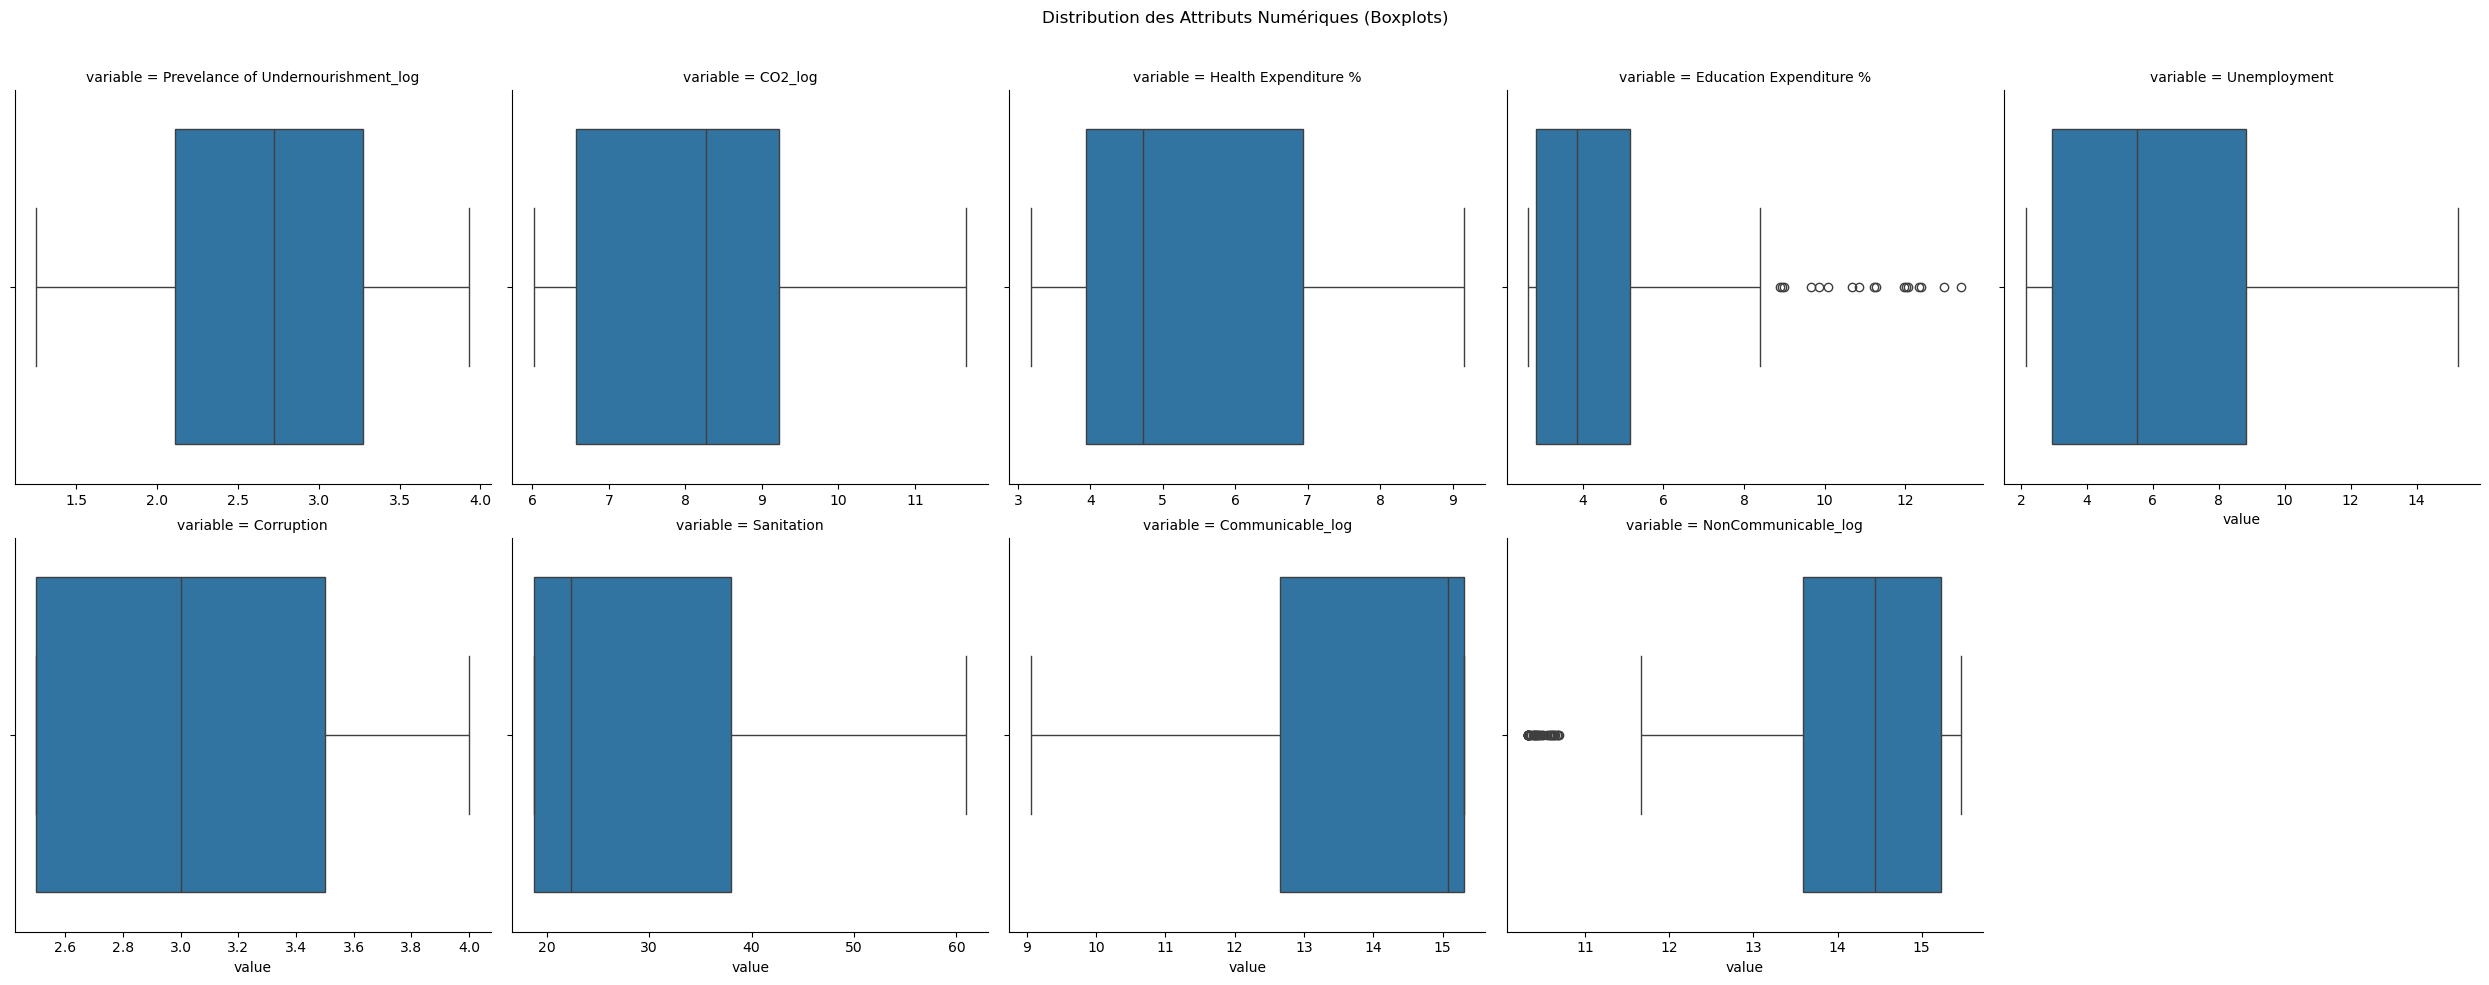

In [84]:
plot_box_donnees_numeriques(df, cols_to_winsorize)

<li><b>Standardisation des données etvisualisation</b></li>

In [87]:
# Liste des colonnes à standardiser
cols_to_standardise = cols_to_winsorize
scaler = RobustScaler()

for col in cols_to_standardise:
    df[col + '_std'] = scaler.fit_transform(df[[col]])


C:\Users\adele\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\adele\anaconda3\Lib

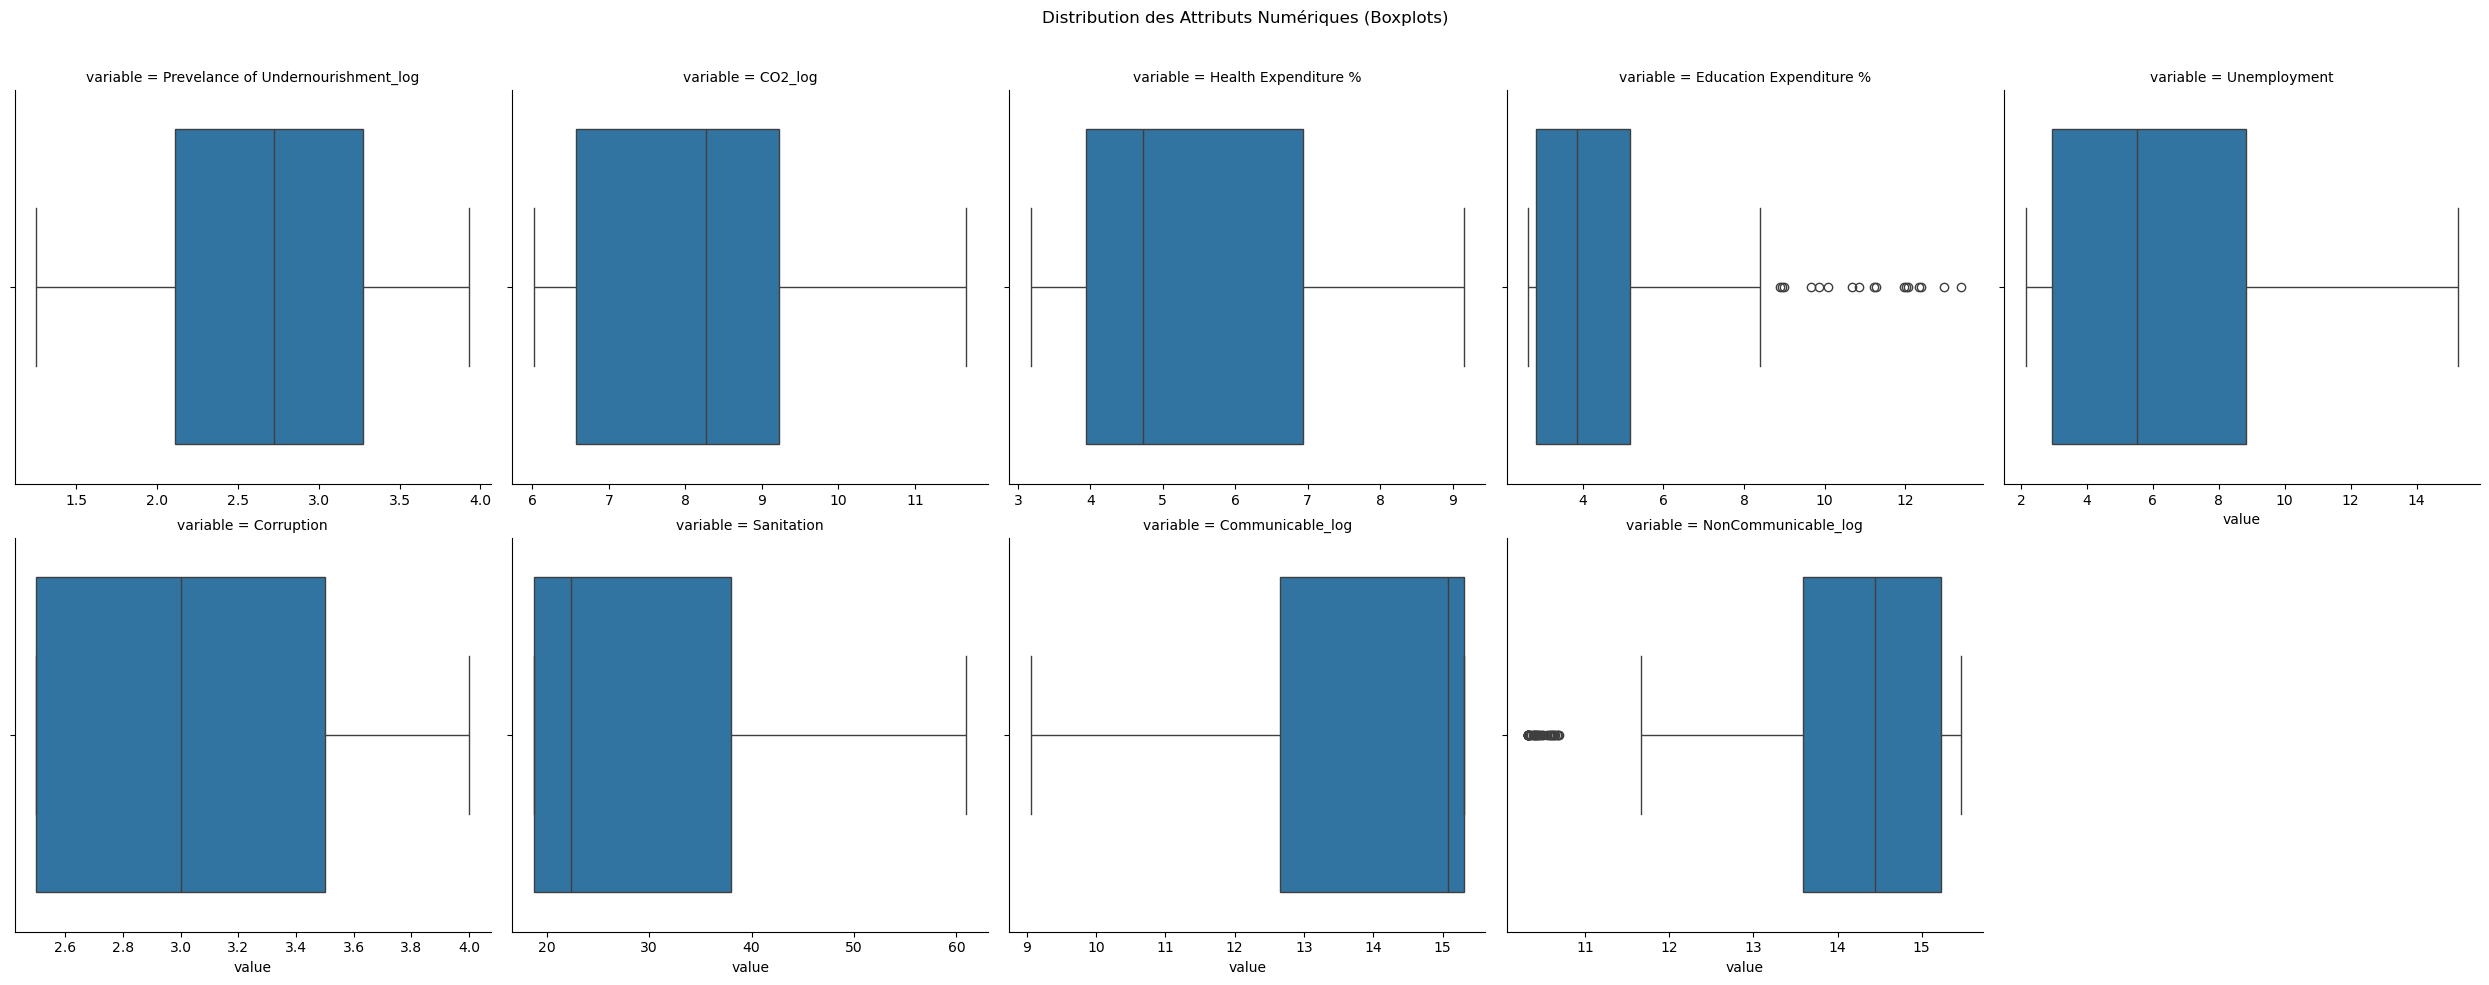

In [89]:
plot_box_donnees_numeriques(df, cols_to_standardise)

In [90]:
col = "Unemployment"

print(f"Statistiques pour la colonne : {col}\n")

print(f"Valeur minimale : {df[col].min()}")
print(f"1er percentile (1%) : {df[col].quantile(0.01)}")
print(f"5e percentile (5%) : {df[col].quantile(0.05)}")
print(f"Médiane (50%) : {df[col].median()}")
print(f"95e percentile (75%) : {df[col].quantile(0.75)}")
print(f"99e percentile (95%) : {df[col].quantile(0.95)}")
print(f"Valeur maximale : {df[col].max()}")


Statistiques pour la colonne : Unemployment

Valeur minimale : 2.14499998092651
1er percentile (1%) : 2.14499998092651
5e percentile (5%) : 2.14499998092651
Médiane (50%) : 6.65999984741211
95e percentile (75%) : 12.29875016212465
99e percentile (95%) : 15.2700004577637
Valeur maximale : 15.2700004577637


C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [93]:
percentag_abberantes = proportion_valeurs_abberantes(df)
print("Pourcentage des valeurs abbéranres pour chaque variable:")
for variable, percentage in percentag_abberantes.items():
    print(f"{variable}: {percentage:.2f}%")


Pourcentage des valeurs abbéranres pour chaque variable:
Year: 0.00%
Life Expectancy World Bank: 0.64%
Prevelance of Undernourishment: 5.72%
CO2: 14.90%
Health Expenditure %: 0.00%
Education Expenditure %: 2.71%
Unemployment: 0.00%
Corruption: 1.13%
Sanitation: 0.00%
Injuries: 11.52%
Communicable: 15.28%
NonCommunicable: 13.28%
Injuries_log: 4.20%
NonCommunicable_log: 0.00%
Communicable_log: 0.00%
CO2_log: 0.00%
Prevelance of Undernourishment_log: 0.00%
Prevelance of Undernourishment_log_std: 0.00%
CO2_log_std: 0.00%
Health Expenditure %_std: 0.00%
Education Expenditure %_std: 2.71%
Unemployment_std: 0.00%
Corruption_std: 1.13%
Sanitation_std: 0.00%
Communicable_log_std: 0.00%
NonCommunicable_log_std: 0.00%


C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adele\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

<h2 style="color: darkblue;">2. Préparation des données : Preprocessing</h2>

In [96]:
# Sélection des colonnes explicatives et de la cible
feature_cols = ['Country Name', 'Region', 'IncomeGroup',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Communicable',
       'NonCommunicable']
X = df[feature_cols].values
y = df['Life Expectancy World Bank'].values

print("Features:", feature_cols)
print("Dimension X:", X.shape, "Dimension y:", y.shape)


Features: ['Country Name', 'Region', 'IncomeGroup', 'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Communicable', 'NonCommunicable']
Dimension X: (3306, 13) Dimension y: (3306,)


In [98]:
# Reprendre le même découpage temporel que précédemment pour X et y

train_end_year = 2015
X_train = df[df['Year'] <= train_end_year][feature_cols]
y_train = df[df['Year'] <= train_end_year]['Life Expectancy World Bank']

X_test  = df[df['Year'] > train_end_year][feature_cols]
y_test  = df[df['Year'] > train_end_year]['Life Expectancy World Bank']

print(f"Taille entraînement: {len(y_train)}, test: {len(y_test)}")


Taille entraînement: 2610, test: 696


<li><b>Imputation des valeurs manquantes dans X_train et X_test</b></li>

In [101]:
# Copie initiale 
df_copie = df.copy()

# Étape 1 : Imputation par groupe 
grouping_dict = {
    'Prevelance of Undernourishment': 'Region',
    'CO2': 'Region',
    'Health Expenditure %': 'IncomeGroup',
    'Education Expenditure %': 'IncomeGroup',
    'Unemployment': 'Region',	
    'Corruption': 'Region',
    'Sanitation': 'Region'
}
# Imputation sur train
X_train, train_group_means = groupwise_impute(X_train, grouping_dict)

# Imputation sur test avec les moyennes du train
X_test = apply_groupwise_impute(X_test, grouping_dict, train_group_means)

# Cas spécial : Corruption NaN pour "High income" 
# dans la catégorie 'High Income' de la colonne 'Corruption' toutes les valeurs sont NaN, donc on va supposer une valeur pour remplecer les NaNs
X_train.loc[(X_train["IncomeGroup"] == "High income") & (X_train["Corruption"].isna()), "Corruption"] = 4
X_test.loc[(X_test["IncomeGroup"] == "High income") & (X_test["Corruption"].isna()), "Corruption"] = 4

# la valeur 4 est choisit car elle n'est pas loin de la moyenne des autres categories mais plus élévé
# ce qui suposerais une corruption plus élvée dans cette catégorie

<li><b>Imputation des valeurs manquantes dans y_train et y_test</b></li>

In [104]:
# Étape 2 : Imputation de y 
y_train_, global_mean = groupwise_target_impute(y_train, df_copie, group_col="IncomeGroup", target_col="Life Expectancy World Bank")
y_test_ = y_test.fillna(global_mean)


<li><b>Transformation log pour réduire l'asymétrie des distributions</b></li>

In [107]:
# Étape 3 : Transformation log 
num_features = ['NonCommunicable', 'Communicable', 'CO2', 'Prevelance of Undernourishment']
for col in num_features:
    X_train[col + '_log'] = np.log1p(X_train[col])
    X_test[col + '_log'] = np.log1p(X_test[col])


<li><b>Winsorization pour limiter l'influence des valeurs extrêmes sans les supprimer</b></li>

In [110]:
# Étape 4 : Winsorization (important: avant standardisation) 
cols_to_winsorize = [
    "Prevelance of Undernourishment_log", "CO2_log",
    "Health Expenditure %", "Education Expenditure %",
    "Unemployment", "Corruption", "Sanitation",
    "Communicable_log", "NonCommunicable_log"
]
for col in cols_to_winsorize:
    X_train[col] = winsorize(X_train[col], limits=[0.2, 0.2])
    X_test[col] = winsorize(X_test[col], limits=[0.2, 0.2])

<li><b>Standardisation des données pour ramener toutes les variables à la même échelle</b></li>

In [113]:
# Étape 5 : Standardisation 
cols_to_standardise = cols_to_winsorize  # même liste
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train[cols_to_standardise])
X_test_scaled = robust_scaler.transform(X_test[cols_to_standardise])

# Ajouter les colonnes standardisées
X_train_std = pd.DataFrame(X_train_scaled, columns=[col + '_std' for col in cols_to_standardise], index=X_train.index)
X_test_std = pd.DataFrame(X_test_scaled, columns=[col + '_std' for col in cols_to_standardise], index=X_test.index)

X_train = pd.concat([X_train, X_train_std], axis=1)
X_test = pd.concat([X_test, X_test_std], axis=1)

<li><b>Encodage des variable catégorielles</b></li>

In [116]:
# Étape 6 : Encodage ordinal de IncomeGroup 
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
ordinal_encoder = OrdinalEncoder(categories=[income_order])
X_train['IncomeGroup_encoded'] = ordinal_encoder.fit_transform(X_train[['IncomeGroup']])
X_test['IncomeGroup_encoded'] = ordinal_encoder.transform(X_test[['IncomeGroup']])

# Étape 7 : OneHot Encoding de Region 
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = onehot_encoder.fit_transform(X_train[['Region']])
encoded_test = onehot_encoder.transform(X_test[['Region']])

encoded_columns = onehot_encoder.get_feature_names_out(['Region'])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)


<li><b>Sélection des variables finales utilisées dans le modele</b></li>

In [119]:
# Étape 8 : Sélection des colonnes finales 
final_columns = [col + '_std' for col in cols_to_standardise] + ['IncomeGroup_encoded'] + list(encoded_columns)

X_train_processed = X_train[final_columns]
X_test_processed = X_test[final_columns]

In [121]:
#toutes les étapes de preprocessing

In [123]:
# #  Copie initiale 
# df_copie = df.copy()

# #  Étape 1 : Imputation par groupe 
# grouping_dict = {
#     'Prevelance of Undernourishment': 'Region',
#     'CO2': 'Region',
#     'Health Expenditure %': 'IncomeGroup',
#     'Education Expenditure %': 'IncomeGroup',
#     'Unemployment': 'Region',	
#     'Corruption': 'Region',
#     'Sanitation': 'Region'
# }

# # Imputation sur train
# X_train, train_group_means = groupwise_impute(X_train, grouping_dict)

# # Imputation sur test avec les moyennes du train
# X_test = apply_groupwise_impute(X_test, grouping_dict, train_group_means)

# # Cas spécial : Corruption NaN pour "High income"
# X_train.loc[(X_train["IncomeGroup"] == "High income") & (X_train["Corruption"].isna()), "Corruption"] = 4
# X_test.loc[(X_test["IncomeGroup"] == "High income") & (X_test["Corruption"].isna()), "Corruption"] = 4

#--------------------------------------------------------------------------------------------#
# #  Étape 2 : Imputation de y 
# y_train_, global_mean = groupwise_target_impute(y_train, df_copie, group_col="IncomeGroup", target_col="Life Expectancy World Bank")
# y_test_ = y_test.fillna(global_mean)

#--------------------------------------------------------------------------------------------#

# #  Étape 3 : Transformation log 
# num_features = ['NonCommunicable', 'Communicable', 'CO2', 'Prevelance of Undernourishment']
# for col in num_features:
#     X_train[col + '_log'] = np.log1p(X_train[col])
#     X_test[col + '_log'] = np.log1p(X_test[col])

#--------------------------------------------------------------------------------------------#

# #  Étape 4 : Winsorization (AVANT standardisation) 
# cols_to_winsorize = [
#     "Prevelance of Undernourishment_log", "CO2_log",
#     "Health Expenditure %", "Education Expenditure %",
#     "Unemployment", "Corruption", "Sanitation",
#     "Communicable_log", "NonCommunicable_log"
# ]
# for col in cols_to_winsorize:
#     X_train[col] = winsorize(X_train[col], limits=[0.2, 0.2])
#     X_test[col] = winsorize(X_test[col], limits=[0.2, 0.2])

#--------------------------------------------------------------------------------------------#

# #  Étape 5 : Standardisation 
# cols_to_standardise = cols_to_winsorize  
# robust_scaler = RobustScaler()
# X_train_scaled = robust_scaler.fit_transform(X_train[cols_to_standardise])
# X_test_scaled = robust_scaler.transform(X_test[cols_to_standardise])

# # Ajouter les colonnes standardisées
# X_train_std = pd.DataFrame(X_train_scaled, columns=[col + '_std' for col in cols_to_standardise], index=X_train.index)
# X_test_std = pd.DataFrame(X_test_scaled, columns=[col + '_std' for col in cols_to_standardise], index=X_test.index)

# X_train = pd.concat([X_train, X_train_std], axis=1)
# X_test = pd.concat([X_test, X_test_std], axis=1)

#--------------------------------------------------------------------------------------------#

# # Étape 6 : Encodage ordinal de IncomeGroup 
# income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
# ordinal_encoder = OrdinalEncoder(categories=[income_order])
# X_train['IncomeGroup_encoded'] = ordinal_encoder.fit_transform(X_train[['IncomeGroup']])
# X_test['IncomeGroup_encoded'] = ordinal_encoder.transform(X_test[['IncomeGroup']])

# # Étape 7 : OneHot Encoding de Region 
# onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoded_train = onehot_encoder.fit_transform(X_train[['Region']])
# encoded_test = onehot_encoder.transform(X_test[['Region']])

# encoded_columns = onehot_encoder.get_feature_names_out(['Region'])
# encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
# encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)

# X_train = pd.concat([X_train, encoded_train_df], axis=1)
# X_test = pd.concat([X_test, encoded_test_df], axis=1)

# # Étape 8 : Sélection des colonnes finales 
# final_columns = [col + '_std' for col in cols_to_standardise] + ['IncomeGroup_encoded'] + list(encoded_columns)

# X_train_processed = X_train[final_columns]
# X_test_processed = X_test[final_columns]


In [125]:
y_train_

0       56.308000
1       47.059000
2       74.288000
3       77.924736
4       74.544000
          ...    
2605    69.869000
2606    72.730000
2607    62.649000
2608    61.737000
2609    59.534000
Name: Life Expectancy World Bank, Length: 2610, dtype: float64

In [127]:
y_test_

2610    63.763000
2611    59.925000
2612    78.194000
2613    69.748362
2614    77.470000
          ...    
3301    70.474000
3302    73.321000
3303    64.131000
3304    63.886000
3305    61.490000
Name: Life Expectancy World Bank, Length: 696, dtype: float64

In [129]:
X_train_processed.head(2)

,Prevelance of Undernourishment_log_std,CO2_log_std,Health Expenditure %_std,Education Expenditure %_std,Unemployment_std,Corruption_std,Sanitation_std,Communicable_log_std,NonCommunicable_log_std,IncomeGroup_encoded,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,0.588503,-0.612607,0.719680,-0.789644,0.459342,0.60137,-0.067976,0.677057,0.520768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.588503,0.093667,-0.367572,-0.043297,-0.340306,0.00000,-0.352645,0.677057,0.276515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [131]:
X_test_processed.head(2)

,Prevelance of Undernourishment_log_std,CO2_log_std,Health Expenditure %_std,Education Expenditure %_std,Unemployment_std,Corruption_std,Sanitation_std,Communicable_log_std,NonCommunicable_log_std,IncomeGroup_encoded,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
2610,0.471918,-0.219708,0.735175,-0.766014,0.500353,-1.281265,-0.067976,0.615686,0.602548,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2611,0.403597,0.270803,-0.451445,-0.942885,0.060165,0.000000,-0.352645,0.615686,0.423508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
#Verifier s'il n y a aucune valeur niulle
X_test_processed.isnull().sum()

Prevelance of Undernourishment_log_std    0
CO2_log_std                               0
Health Expenditure %_std                  0
Education Expenditure %_std               0
Unemployment_std                          0
Corruption_std                            0
Sanitation_std                            0
Communicable_log_std                      0
NonCommunicable_log_std                   0
IncomeGroup_encoded                       0
Region_East Asia & Pacific                0
Region_Europe & Central Asia              0
Region_Latin America & Caribbean          0
Region_Middle East & North Africa         0
Region_North America                      0
Region_South Asia                         0
Region_Sub-Saharan Africa                 0
dtype: int64

In [124]:
save_to_csv(y_train_, "y_train.csv")
save_to_csv(X_train_processed, "X_train.csv")


save_to_csv(y_test_, "y_test.csv")
save_to_csv(X_test_processed, "X_test.csv")


In [9]:
#load clean preprocessed datasets

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", usecols=["Life Expectancy World Bank"]).squeeze()

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv", usecols=["Life Expectancy World Bank"]).squeeze()

<h2 style="color: darkblue;">3. Modélisation : Prédiction multivariée de l'espérance de vie</h2>

***Entraînement de différents modèles de régression***

Nous allons comparer plusieurs modèles de Machine Learning pour la prédiction de l’espérance de vie :

**Régression linéaire multiple** – modélise l’espérance de vie comme une combinaison linéaire des features. C’est un modèle simple, interprétable, mais qui peut manquer de puissance s’il y a des non-linéarités.


**Forêt d’arbres décisionnels (Random Forest)** – un ensemble de plusieurs arbres de décision entraînés sur des sous-échantillons, puis moyennés. Ce modèle peut capturer des relations non linéaires et interactions sans nécessiter de normalisation, et gère bien les features non linéairement liées à la cible.


**XGBoost (Extreme Gradient Boosting)** – un modèle de boosting qui ajoute des arbres séquentiellement pour corriger les erreurs du précédent. XGBoost est souvent très performant, y compris sur de petits jeux de données, en capturant finement les patterns.

In [125]:
# 1. Régression Linéaire
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train_)
y_pred_lin = linreg.predict(X_test_processed)


In [127]:
# 2. Forêt Aléatoire
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_processed, y_train_)  # on peut utiliser X non-scalé pour Random Forest
y_pred_rf = rf.predict(X_test_processed)


In [129]:
# 3. XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb.fit(X_train_processed, y_train_)
y_pred_xgb = xgb.predict(X_test_processed)

<h2 style="color: darkblue;">4. Évaluation des performances des modèles</h2>

In [132]:
# Évaluer chaque modèle
evaluate(y_test_, y_pred_lin, "Linear Regression")
evaluate(y_test_, y_pred_rf, "Random Forest")
evaluate(y_test_, y_pred_xgb, "XGBoost")


--- Linear Regression ---
MAE  : 3.40
RMSE : 4.31
R²   : 0.680

--- Random Forest ---
MAE  : 2.01
RMSE : 2.94
R²   : 0.851

--- XGBoost ---
MAE  : 1.90
RMSE : 2.61
R²   : 0.882



In [137]:
results = []
def evaluate_metrics(y_true, y_pred, model_name):
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append([model_name, mae, rmse, r2])
    return results


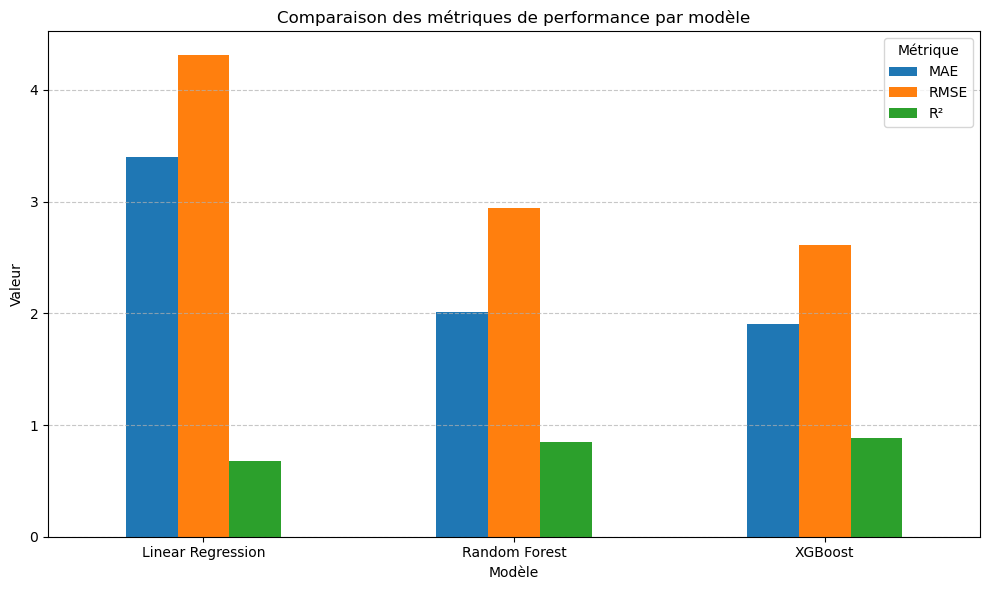

In [139]:
# Étape 1 : calculer les métriques
evaluate_metrics(y_test_, y_pred_lin, "Linear Regression")
evaluate_metrics(y_test_, y_pred_rf, "Random Forest")
evaluate_metrics(y_test_, y_pred_xgb, "XGBoost")

# Étape 2 : créer un DataFrame
metrics_df = pd.DataFrame(results, columns=["Modèle", "MAE", "RMSE", "R²"])
metrics_df.set_index("Modèle", inplace=True)

# Étape 3 : plot des trois métrics de performance
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparaison des métriques de performance par modèle")
plt.ylabel("Valeur")
plt.xticks(rotation=0)
plt.legend(title="Métrique")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


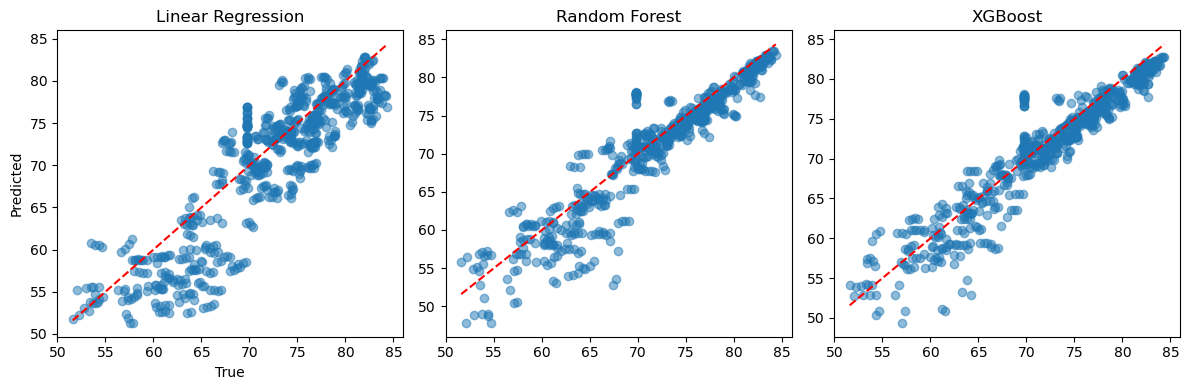

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test_, y_pred_lin, alpha=0.5)
plt.plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("True")
plt.ylabel("Predicted")

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test_, y_pred_rf, alpha=0.5)
plt.plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 'r--')
plt.title("Random Forest")

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test_, y_pred_xgb, alpha=0.5)
plt.plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 'r--')
plt.title("XGBoost")

plt.tight_layout()
plt.show()


<h1 style="color: red;"> Conclusion
</h1>

### Comparaison de la qualité des prévisions des modèles 

###  **Régression linéaire : simple, mais peut ne pas tenir compte de la complexité des données.**

1. Comme la **régression linéaire** cherche une droite (ou un plan) pour expliquer la relation entre les variables elle suppose que tout est linéaire...
2. Si es données ne suivenet pas une relation droite, ce model ne ne prédit pas correctement.
3. Elle ne capte ni les effets combinés entre variables : par exemple pour les variables  'revenu ' et 'éducation '  régression linéaire va estimer leur effet indépendamment mais il se peut que  le revenu élevé n’augmente l’espérance de vie que si la personne est aussi bien éduquée.
   c'est donc important de voir  l'effet combiné ou interaction.

---

###  **Random Forest: meilleure précision globale**

1. Une forêt aléatoire construit plein d’arbres de décision sur des sous-échantillons aléatoires de tes données.
2. Chaque arbre apprend différemment, et la forêt moyenne leurs prédictions → cela réduit le risque de surapprentissage.
3. Gère bien les données bruitées, les relations non linéaires

---

###  **XGBoost: Bon compromis entre performance et robustesse**
1. XGBoost fonctionne comme une "forêt intelligente" : au lieu de créer tous les arbres d’un coup (comme Random Forest), il les construit un par un.
2. Chaque nouvel arbre est formé pour corriger les erreurs des arbres précédents  c’est un apprentissage itératif et ciblé.
3. Il peut capturer des relations complexes, subtiles, et même les interactions entre variables.
4. Il est Robust C'est a dire il ne se laisse pas trop influencer par des erreurs, des valeurs aberrantes.
5. Come ce modele ne mémorise pas les données d.entranement mais la patterns , il est résistant a l'Overfitting


# FIN